## **Libararies Export**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,confusion_matrix , classification_report , accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

- Data Load

In [2]:
Data = pd.read_csv(r'D:\AI Course\mushrooms.csv')

In [3]:
Data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## EDA

In [5]:
Data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
Data.duplicated().sum()

0

In [7]:
Data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [8]:
Data.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [9]:
Data.shape

(8124, 23)

## **Unaryvarient Analysis**

- class

In [10]:
data_frame = Data['class'].value_counts()

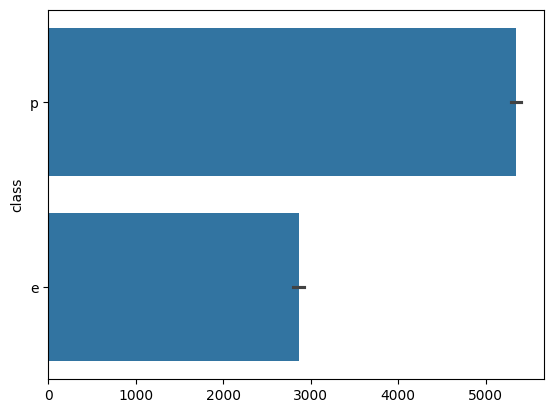

In [11]:
sns.barplot(Data['class']);

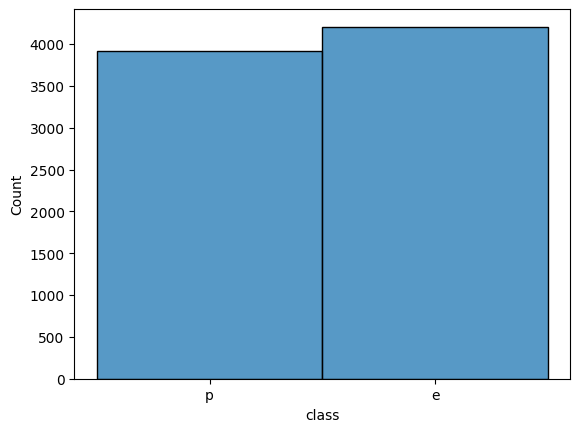

In [12]:
sns.histplot(Data['class']);

In [13]:
Data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

- cap-shape

In [14]:
Data['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

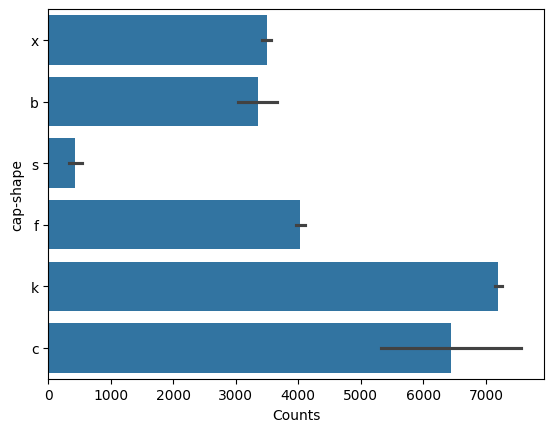

In [15]:
sns.barplot(Data['cap-shape'])
plt.xlabel('Counts');

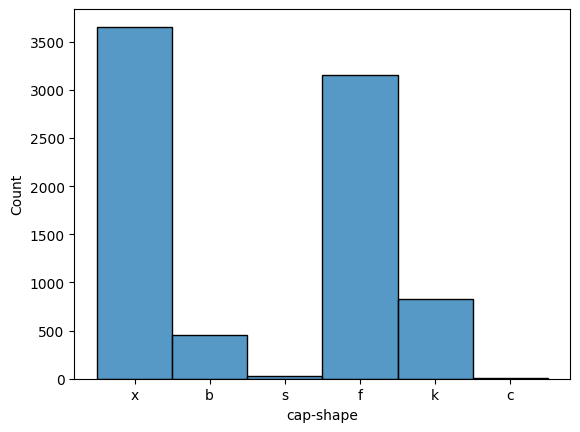

In [16]:
sns.histplot(Data['cap-shape']);

- cap-surface

In [17]:
Data['cap-surface'].value_counts()

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

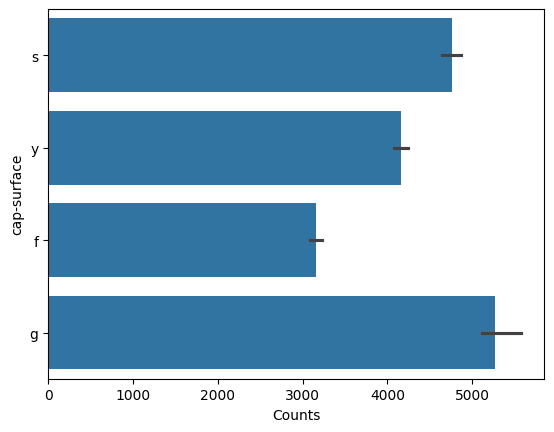

In [18]:
sns.barplot(Data['cap-surface'])
plt.xlabel('Counts');

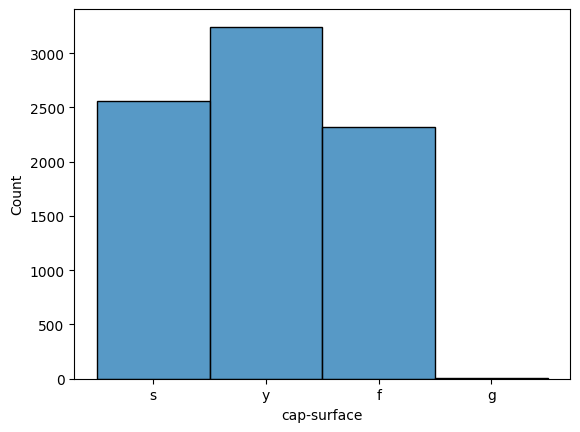

In [19]:
sns.histplot(Data['cap-surface']);

- bruises

In [20]:
Data['bruises'].value_counts()

bruises
f    4748
t    3376
Name: count, dtype: int64

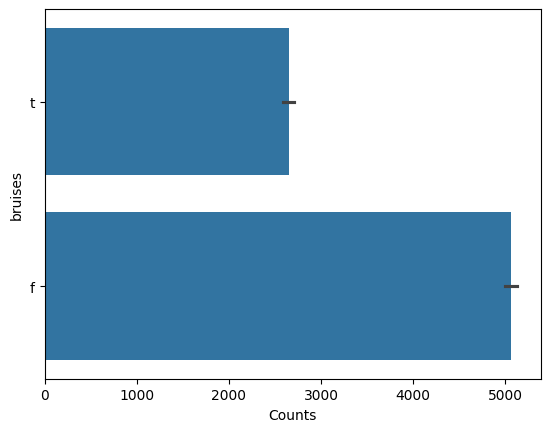

In [21]:
sns.barplot(Data['bruises'])
plt.xlabel('Counts');

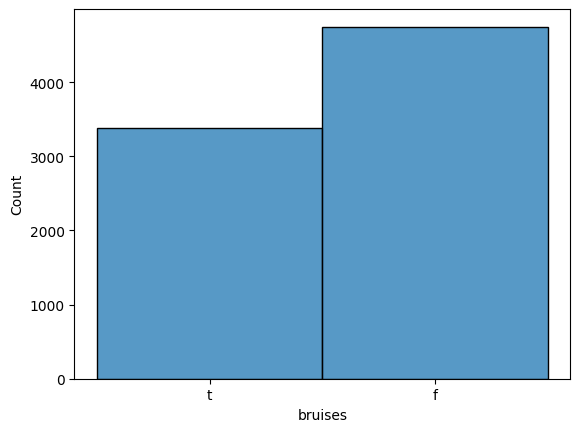

In [22]:
sns.histplot(Data['bruises']);

## **Identifing Features and Target**

In [23]:
x = Data.drop(columns=['class'])
y = Data['class']

In [24]:
Encoder1 = OneHotEncoder()

In [25]:
x = Encoder1.fit_transform(x)

In [26]:
x

<8124x117 sparse matrix of type '<class 'numpy.float64'>'
	with 178728 stored elements in Compressed Sparse Row format>

In [27]:
Encoder = LabelEncoder()

In [28]:
y = Encoder.fit_transform(y)

In [29]:
y

array([1, 0, 0, ..., 0, 1, 0])

## **Models**

- Decision tree Classifier

In [30]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

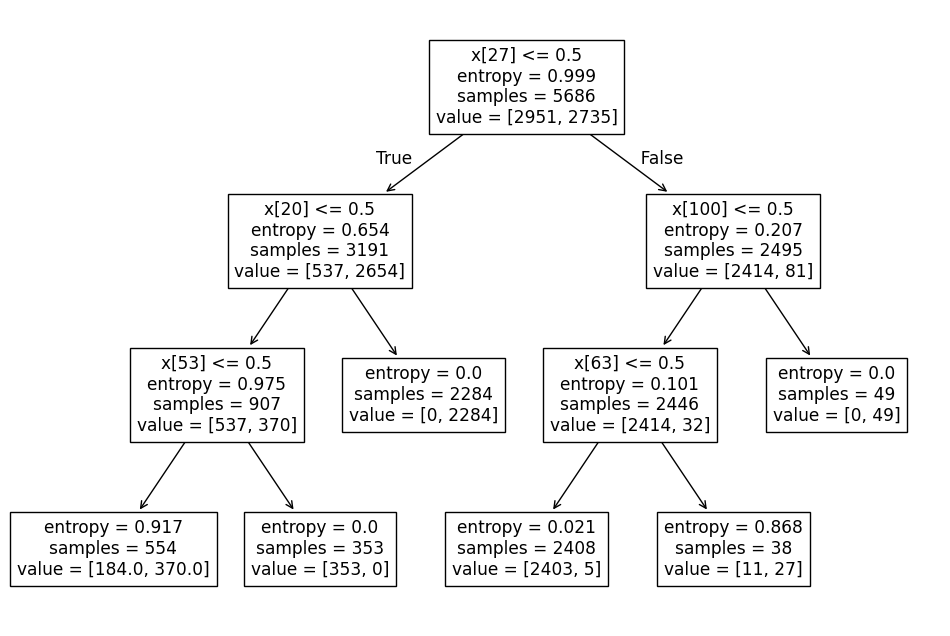

In [32]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_entropy.fit(x_train, y_train));

In [33]:
y1_pred_Dec_tree_clf_train = clf_entropy.predict(x_train)

In [34]:
y1_pred_Dec_tree_clf_test = clf_entropy.predict(x_test)

In [35]:
print('Model data for test Accuracy using Decision Tree with Entropy accuarcy score: {0:0.4f}'.format(accuracy_score(y_train,y1_pred_Dec_tree_clf_train)*100))

Model data for test Accuracy using Decision Tree with Entropy accuarcy score: 96.4826


In [36]:
print('Model data for test Accuracy using Decision Tree with Entropy accuarcy score: {0:0.4f}'.format(accuracy_score(y_test,y1_pred_Dec_tree_clf_test)*100))

Model data for test Accuracy using Decision Tree with Entropy accuarcy score: 95.4061


In [37]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

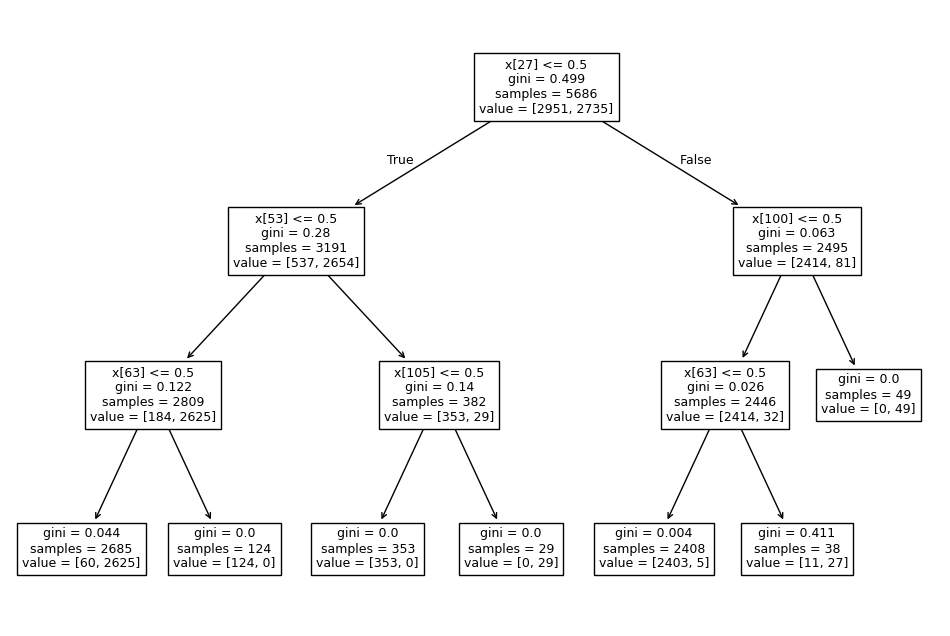

In [38]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(x_train, y_train)); 

In [39]:
y2_pred_Dec_tree_clf_train = clf_gini.predict(x_train)

In [40]:
y2_pred_Dec_tree_clf_test = clf_gini.predict(x_test)

In [41]:
print('Model data for test Accuracy using Decision Tree with gini accuarcy score: {0:0.4f}'.format(accuracy_score(y_train,y2_pred_Dec_tree_clf_train)*100))

Model data for test Accuracy using Decision Tree with gini accuarcy score: 98.6634


In [42]:
print('Model data for test Accuracy using Decision Tree with gini accuarcy score: {0:0.4f}'.format(accuracy_score(y_test,y2_pred_Dec_tree_clf_test)*100))

Model data for test Accuracy using Decision Tree with gini accuarcy score: 98.1952


In [45]:
cm1 = confusion_matrix(y_test, y2_pred_Dec_tree_clf_test)

print('Confusion matrix\n\n', cm1)

Confusion matrix

 [[1216   41]
 [   3 1178]]


<Axes: >

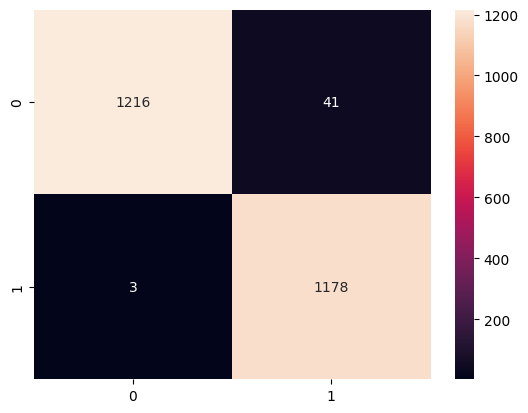

In [ ]:
sns.heatmap(cm1,annot=True,fmt='0.0f')

- Linear Reggressoer

In [ ]:
Regg = LinearRegression()

In [ ]:
Regg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y3_pred_linear_Reg_train = Regg.predict(x_train)

In [ ]:
y3_pred_linear_Reg_test = Regg.predict(x_test)

In [ ]:
Train_Error = mean_squared_error(y_train,y3_pred_linear_Reg_train)
print('Error on test',Train_Error)

Error on test 7.443117500820635e-10


In [ ]:
Train_ErrorRMS = np.sqrt(Train_Error)
print('Error on test RMS',Train_ErrorRMS)

Error on test RMS 2.72820774517276e-05


In [ ]:
Test_Error = mean_squared_error(y_test,y3_pred_linear_Reg_test)
print('Error on test',Test_Error)

Error on test 7.15577890460264e-10


In [ ]:
Test_ErrorRMS = np.sqrt(Test_Error)
print('Error on test RMS',Test_ErrorRMS)

Error on test RMS 2.6750287670607658e-05


- Decision Tree Regressor

In [ ]:
D_tree_Regg = DecisionTreeRegressor(max_depth=10,random_state=42)

In [ ]:
D_tree_Regg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
y4_D_tree_Regg_train = D_tree_Regg.predict(x_train)

In [ ]:
y4_D_tree_Regg_test = D_tree_Regg.predict(x_test)

In [ ]:
mean_squared_error(y_train,y4_D_tree_Regg_train)

0.0

In [ ]:
mean_squared_error(y_test,y4_D_tree_Regg_test)

0.0

In [ ]:
mean_absolute_percentage_error(y_test,y4_D_tree_Regg_test)

0.0

- Logistic Regression

In [ ]:
Log_reg = LogisticRegression(max_iter=1000)

**Note**

In [ ]:
Log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y5_pred_test = Log_reg.predict(x_test)

In [ ]:
ACC1 = accuracy_score(y_test,y5_pred_test)
ACC1

1.0

In [ ]:
cm =confusion_matrix(y_test,y5_pred_test)

<Axes: >

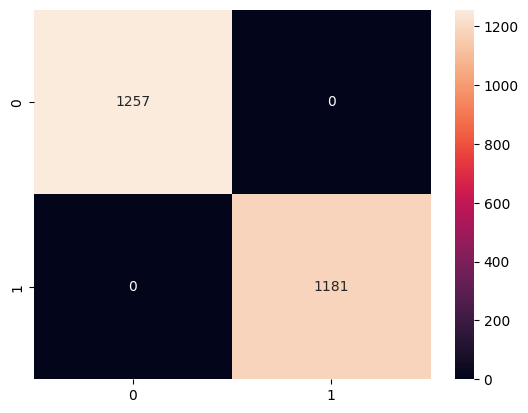

In [ ]:
sns.heatmap(cm,annot=True,fmt='0.0f')

In [ ]:
classification_report(y_test,y5_pred_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1257\n           1       1.00      1.00      1.00      1181\n\n    accuracy                           1.00      2438\n   macro avg       1.00      1.00      1.00      2438\nweighted avg       1.00      1.00      1.00      2438\n'

- The Best Model for reggression is D_Tree_reg 

- The Best model for classisfication is Log_reg